# Taller de Computación Cuántica

## Tema 1:


In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit_ibm_provider


In [ ]:
from qiskit import QuantumCircuit
from math import sqrt, pi
import numpy as np
from qiskit import transpile
from qiskit.visualization import *

## MI PRIMER CIRCUITO ##
Para crear un circuito en qiskit usamos *QuantumCircuit(#qubits)* como una lista de operaciones cuánticas aplicadas a cierto qubit.



In [ ]:
qc=QuantumCircuit(4) #Creamos un circuito cuántico de un qubit

for i in range(4):
    qc.h(i)

 #Compuerta X aplicada al qubit 0
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

Para agregar más operadores, simplemente los agregamos en el orden que queramos.

In [ ]:
qc=QuantumCircuit(1) #Creamos un circuito cuántico de un qubit
 #Compuerta X aplicada al qubit 0
qc.y(0)
qc.draw()

┌───┐
q: ┤ Y ├
   └───┘

In [ ]:
from qiskit_aer import Aer

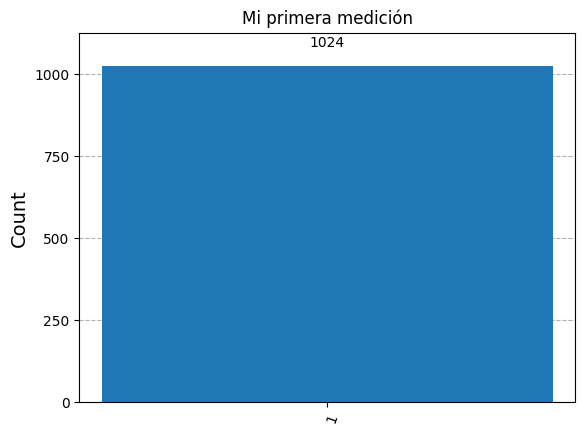

In [ ]:
import qiskit
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

#Medir el circuito
qc.measure_all()

# Transpilar el circuito
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Correr el circuito
resultados = simulator.run(qc).result()
tiradas = resultados.get_counts(qc)
plot_histogram(tiradas, title='Mi primera medición')

In [ ]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit
import qiskit_ibm_provider
from qiskit.visualization import *
from qiskit.visualization import plot_histogram


In [ ]:
#provider = IBMQ.load_account()
#IBMQ.save_account('APITOKEN', overwrite=True)

## Paso 1: Crear nuestro circuito

In [ ]:
circuito = QuantumCircuit(2,2) #(QUBITS,BITS)

circuito.h(0)
circuito.cx(0,1)


circuito.measure(1,1) #(q,c) registra la medición del q1 en el registro clásico c1

circuito.draw()

┌───┐        
q_0: ┤ H ├──■─────
     └───┘┌─┴─┐┌─┐
q_1: ─────┤ X ├┤M├
          └───┘└╥┘
c: 2/═══════════╩═
                1

# Paso 2: Elegir una computadora cuántica para simularlo

In [ ]:
computadora_cuantica = provider.get_backend("ibmq_kyiv")

#¿ibmq_bogota era una computadora cuántica disponible hace algunos meses, por qué nos da error?
Es bastante común que IBM Quantum haga cambios: desactive algunas computadoras y agregue nuevas. Para saber a cuales computadoras tenemos acceso basta con ejecutar .backends () tal como se muestra a continuación.

In [ ]:
 provider.backends()

Ahora podemos agregar una QC de la lista, considerando que las computadoras cuánticas son aquellas del tipo "IBMQBackend"

In [ ]:
computadora_cuantica = provider.get_backend("ibmq_manila")

# Paso 3: Ejecutar y graficar

In [ ]:
job = execute(circuito, computadora_cuantica, shots=1024) #ejecutamos el circuito

counts = job.result().get_counts(circuito) #obtenemos las mediciones de la ejecución

print(job.job_id()) #este id nos sirve para buscar nuestros resultados después, en caso de que los perdamos

plot_histogram(counts)

# ¿Por qué no obtenemos 11?
Porque aunque nuestro estado se determina en ambos, cuando estamos realizando una medicion real necesitamos registrar ambos en un bit clasico.

Como solo registramos el resultado del q1 qiskit toma como default una medición 0, para resolverlo basta con registrar el resultado del q0.

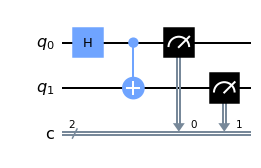

In [ ]:
circuito = QuantumCircuit(2,2) #(QUBITS,BITS)

circuito.h(0)
circuito.cx(0,1)

circuito.measure(0,0)
circuito.measure(1,1)
#También puedes usar .measure_all
#.measure_all crea n registros clasicos
# y guarda las mediciones de los n qubits

circuito.draw()

637137a9c18278818476de99


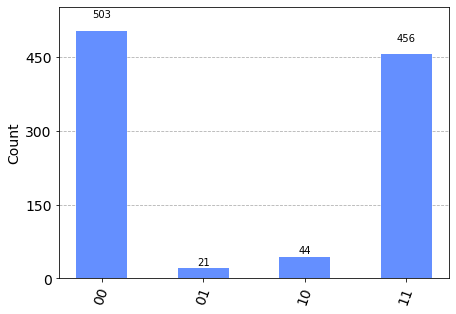

In [ ]:
job = execute(circuito, computadora_cuantica, shots=1024)

counts = job.result().get_counts(circuito)

print(job.job_id())

plot_histogram(counts)

# Deutsch-Jozsa

In [ ]:
from qiskit_textbook.problems import dj_problem_oracle

In [ ]:
oraclenr = 4 #oraculo puede variar de 1 a 5
oracle = dj_problem_oracle(oraclenr) # da uno de los 5 oraculos
oracle.name = "DJ-Oracle" #llama al oraulo en este caso el DJ (Deutsch Jozsa)

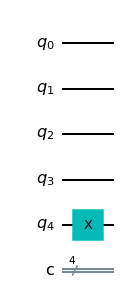

In [ ]:
n=4 #n+1 qubits en el circuito
def psi_0(n):#funcion para colocar la compuerta X en el ultimo qubit
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    return qc

dj_circuit = psi_0(n) #llama la funcion psi_0 y lo guarda en el circuito
dj_circuit.draw()

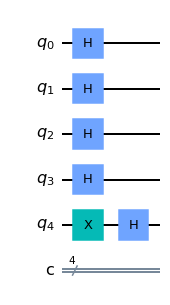

In [ ]:
def psi_1(n):
    #  las n compuertas hadamard
    qc = psi_0(n)# llamamos la funcion de la compuerta x
    for i in range(n+1):
        qc.h(i)
    return qc

dj_circuit = psi_1(n)
dj_circuit.draw()

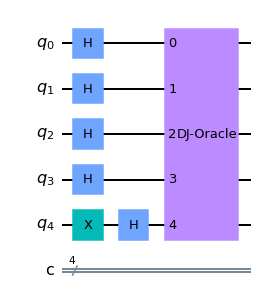

In [ ]:
def psi_2(oracle,n):

    qc = psi_1(n)#llmamos psi_1 (compuertas X y Hadamards)

    # Agregamos el oraculo con .append
    qc.append(oracle, range(n+1))#Especificamos el oraculo y el rango de entradas

    return qc

dj_circuit = psi_2(oracle, n)
dj_circuit.draw()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import *
#from qiskit.providers.ibmq import least_busy
import math


provider = IBMQ.load_account()

# ALGORITMO DE GROVER


Se hace una superposición uniforme.

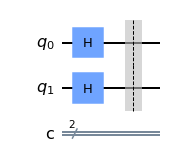

In [ ]:
q = QuantumRegister(2, 'q') #Creamos nuestros registros clasicos y cuanticos
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c) #creamos el circuito con los registros

qc.h(q) #aplicamos hadamard a todos nuestros qubits
qc.barrier(q)
qc.draw()


Añadimos el oráculo. En este caso es la compuerta *CZ*

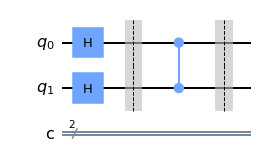

In [ ]:
# Implementamos el oráculo para encontrar |11>
qc.cz(q[1],q[0]) #qc.cz(c,t)
qc.barrier(q)

qc.draw()


Se agrega una Difusión de Grover, también llamada amplificación.

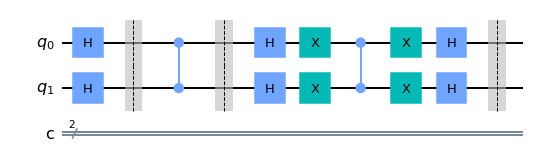

In [ ]:
#Difusion de grover
qc.h(q)
qc.x(q)
qc.cz(q[1],q[0])
qc.x(q)
qc.h(q)
qc.barrier(q)
qc.draw()

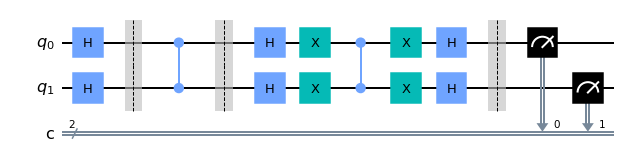

In [ ]:
#Agregamos las mediciones
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])

qc.draw(output='mpl')

RESULT:  {'11': 2048} 



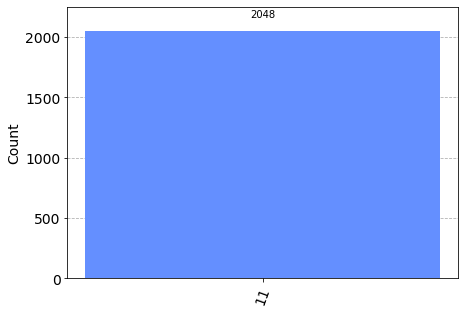

In [ ]:
# Simulando el circuito

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 2048).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)


# Oráculo de Grover en qiskit y Uf iterada
Podemos acceder a *Statevector.from_label* para generar un oráculo acorde al estado cuántico que se busca.


In [ ]:
import random
from qiskit.quantum_info import Statevector

persona = random.randint(0,7)  # escogemos una persona al azar
personabit = format(persona, '03b')  #lo convertimos a un numero binario de 3bits
oracle = Statevector.from_label(personabit)  # le decimos al oráculo la persona que buscamos
print(persona,"->",personabit)

3 -> 011


Llamammos a la función AmplificationProblem, quien amplifica el estado correcto en nuestra iteración de grover.

In [ ]:
from qiskit.algorithms import AmplificationProblem

pregunta = AmplificationProblem(oracle, is_good_state=personabit)

Creamos el circuito con *Grover*

In [ ]:
from qiskit.algorithms import Grover

uf_grover = []
for iteracion in range(1,3): #va a ejecutar dos veces, una para iteracion=1 y otra para iteracion=2
    grover = Grover(iterations = iteracion) #le indica el numero N de iteraciones para generar las N-Iteraciones de Grover
    circuito = grover.construct_circuit(pregunta) #Se construe un circuito cuantico de grover a partir de la amplificación del oráculo
    circuito.measure_all()
    uf_grover.append(circuito) #añadimos el circuito a la lista de circuitos uf_grover

Para una iteracion tenemos:

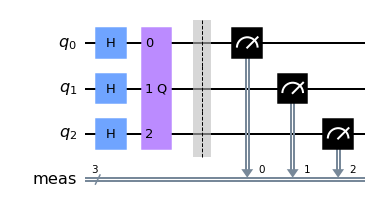

In [ ]:
uf_grover[0].draw()

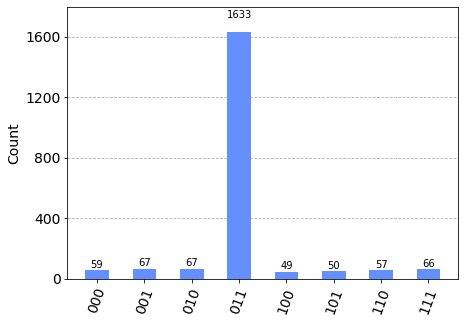

In [ ]:
# Simulando el circuito

result = execute(uf_grover[0], backend = simulator, shots = 2048).result()
counts = result.get_counts()

plot_histogram(counts)

Para dos iteraciones:

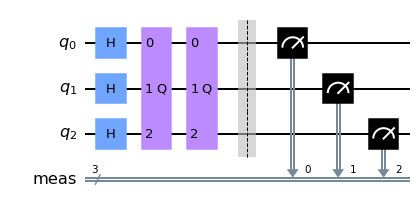

In [ ]:
uf_grover[1].draw()

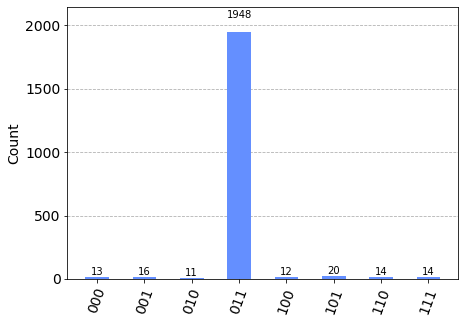

In [ ]:
result = execute(uf_grover[1], backend = simulator, shots = 2048).result()
counts = result.get_counts()

plot_histogram(counts)

Como puedes ver, la precisión del algoritmo de Grover para encontrar la respuesta correcta aumenta con el número de iteraciones.